The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys

sys.path += ["../../../easyXRD"]

import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
from copy import deepcopy

# importing matplotlib for plots.
%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True


In [ ]:
%%time

import pyFAI, fabio

ai_file = "tiff_files/_calibration.poni"
mask_file = "tiff_files/_mask.edf"
ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file="nc_files/Blank.nc", plot=False)


sample_LaB6 = exrd()
# with xr.open_dataset('nc_files/LaB6.nc') as ds:
#     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/LaB6.nc", plot=False)

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file="nc_files/Pt.nc", plot=False)

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file="nc_files/DAHL.nc", plot=False)

sample_Dogbone = exrd(verbose=False)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file="nc_files/Dogbone.nc", plot=True)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_Pt = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]


phases_Zr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_ZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

# LaB6

In [ ]:
sample = deepcopy(sample_LaB6)

sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1, 4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=False,
)

sample.load_phases(phases=phases_LaB6, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=True,
    normalize=True,
    )

sample.refine_background(num_coeffs=20,plot=True)
sample.set_LeBail(set_to=False, refine=True, plot=True)

# Pt

In [ ]:
%%time

sample = deepcopy(sample_Pt)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=False,
    roi_radial_range=[2, 4],
    plot=False,
)
sample.load_phases(phases=phases_Pt, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=False,
    normalize=True,
    )

sample.refine_background(num_coeffs=5, plot=True)
sample.refine_cell_parameters(plot=True)
sample.refine_strain_broadening(plot=True)
sample.refine_size_broadening(plot=True)
sample.refine_background(num_coeffs=5, plot=True)

sample.set_LeBail(set_to=False, refine=True, plot=True)
sample.refine_preferred_orientation(phase_ind=0, harmonics_order=4, plot=True)
sample.refine_background(num_coeffs=5, plot=True)

# DAHL

In [ ]:
%%time

sample = deepcopy(sample_DAHL)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_PtZr, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=False,
    normalize=True,
    )

# sample.refine_background(num_coeffs=1, plot=True)
sample.refine_cell_parameters(plot=True)
sample.refine_strain_broadening(plot=True)
sample.refine_size_broadening(plot=True)
sample.refine_background(num_coeffs=5, plot=True)

sample.set_LeBail(set_to=False, refine=True, plot=True)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)

sample.refine_preferred_orientation(phase_ind=0, harmonics_order=4, plot=True)
sample.refine_preferred_orientation(phase_ind=1, harmonics_order=4, plot=True)

sample.refine_background(num_coeffs=10, plot=True)

# Dogbone


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 21.428/0.319 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 20.272/0.302 on 4 variable(s) (was 21.428(-5.39%)/0.319(-5.26%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.721/0.100 on 5 variable(s) (was 20.272(-66.85%)/0.302(-66.83%✨))
 ✅--Background is refined. Rwp/GoF is now 5.661/0.085 on 11 variable(s) (was 6.721(-15.77%)/0.100(-15.54%✨))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 70.571/1.049 on 1 variable(s) (was 5.661(1146.66%)/0.085(1140.87%❗))
 ✅--Phase fractions of all phases are refined. Rwp/GoF is now 51.786/0.770 on 2 variable(s) (was 70.571(-26.62%)/1.049(-26.58%✨))
 ✅--Preferred orientation for Zr phase is refined. Rwp/GoF is now 8.154/0.121 on 4 variable(s) (was 51.786(-84.25%)/0.770(-84.24%✨))
 ✅--Background is refined. Rwp/GoF is now 8.096/0.121 on 12 variable(s) (was 8.154(-0.71%)/0.121(-0.34%❗))
CPU times: user 2.56 s, sys: 57.6 ms, total: 2

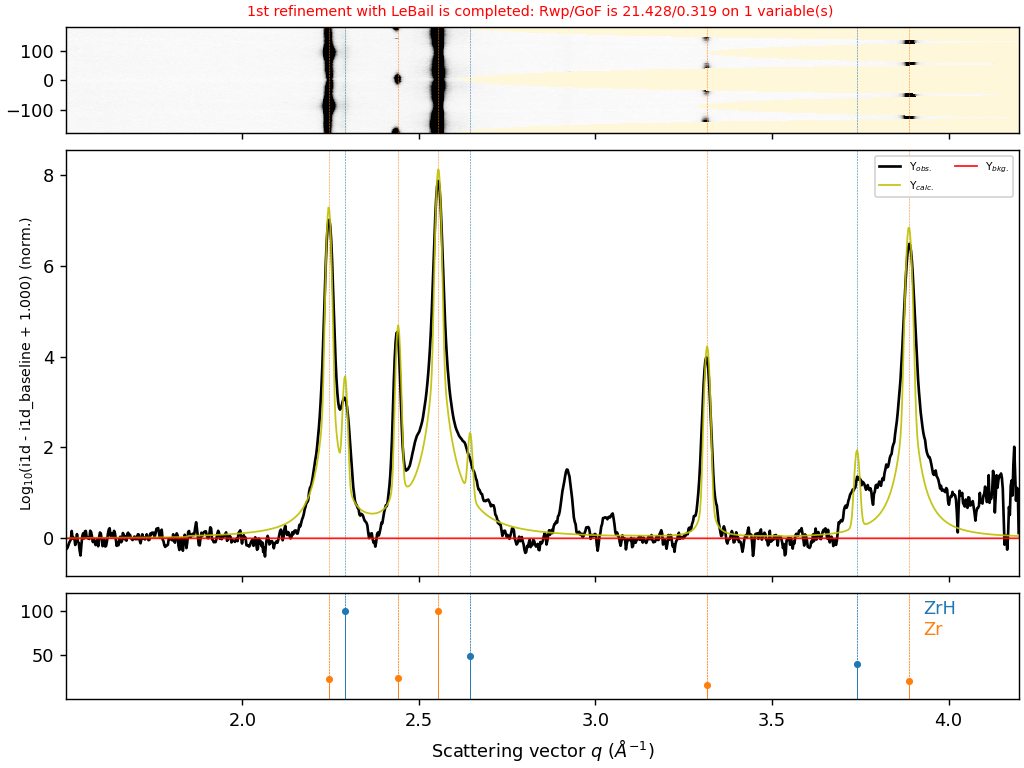

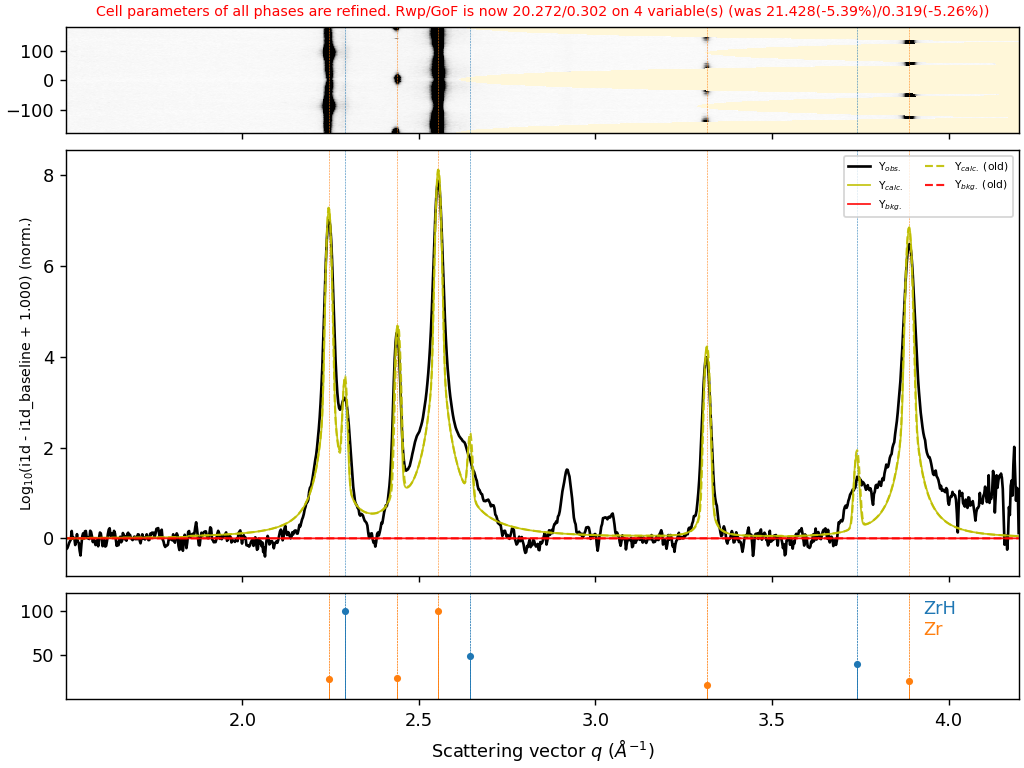

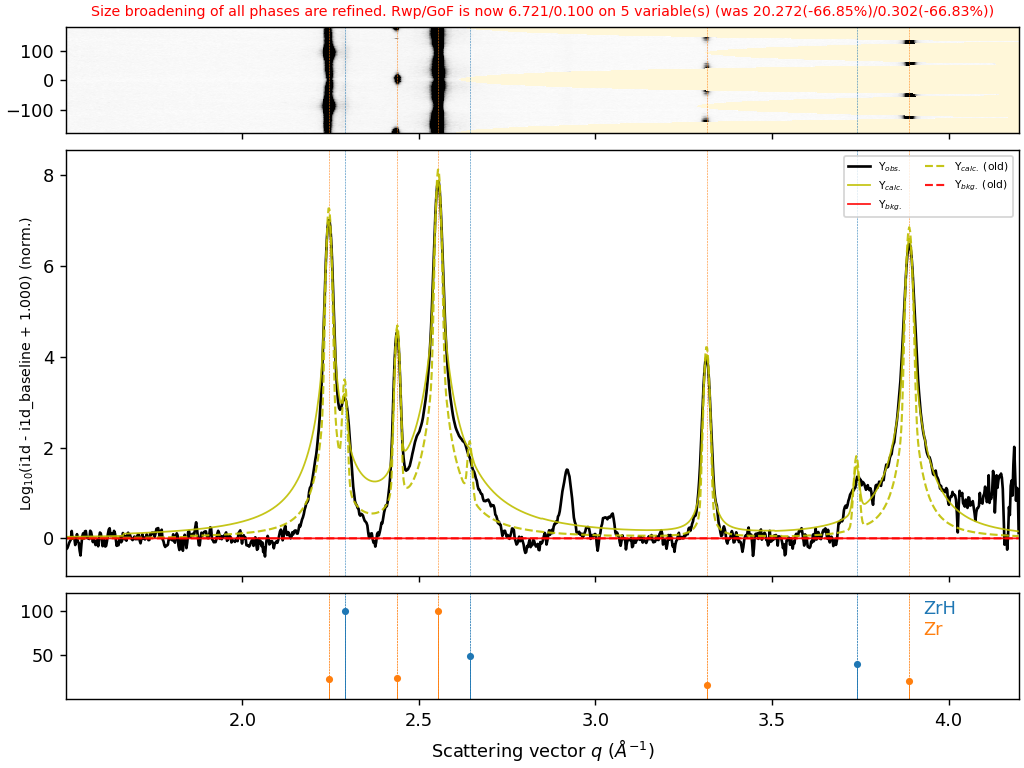

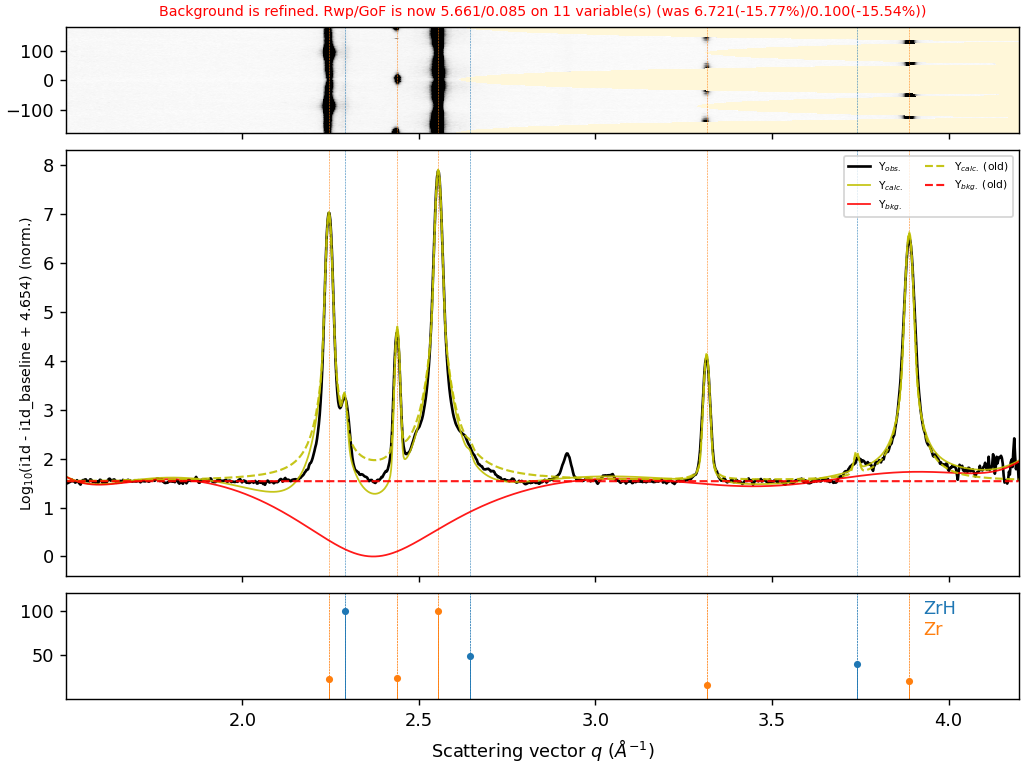

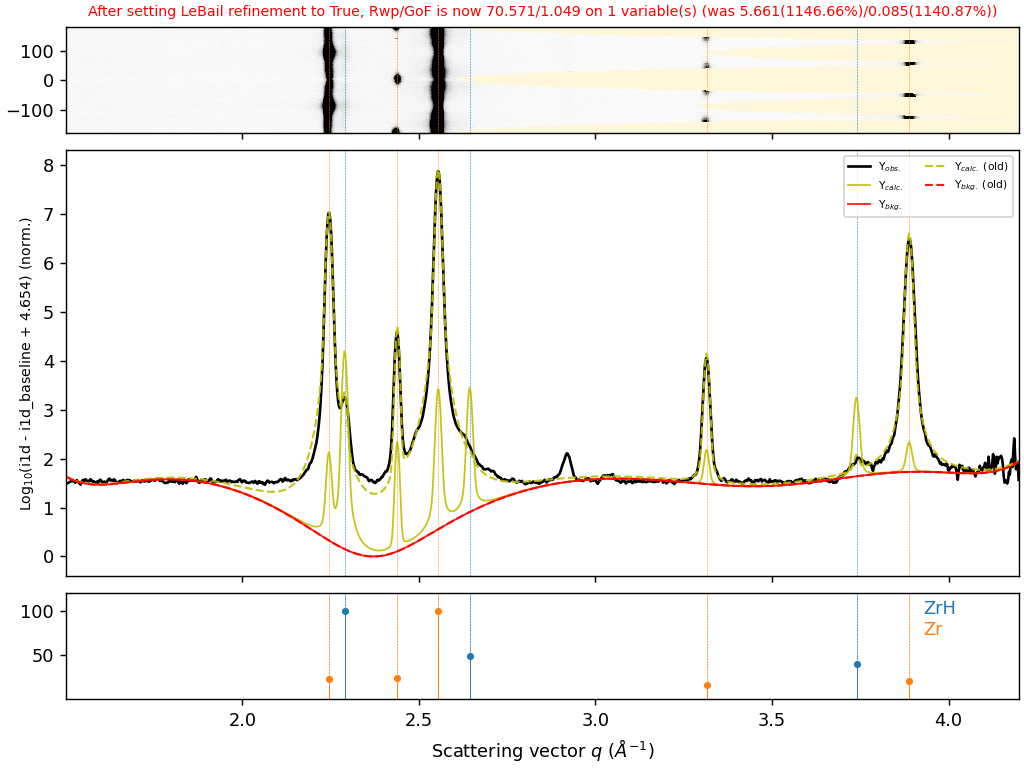

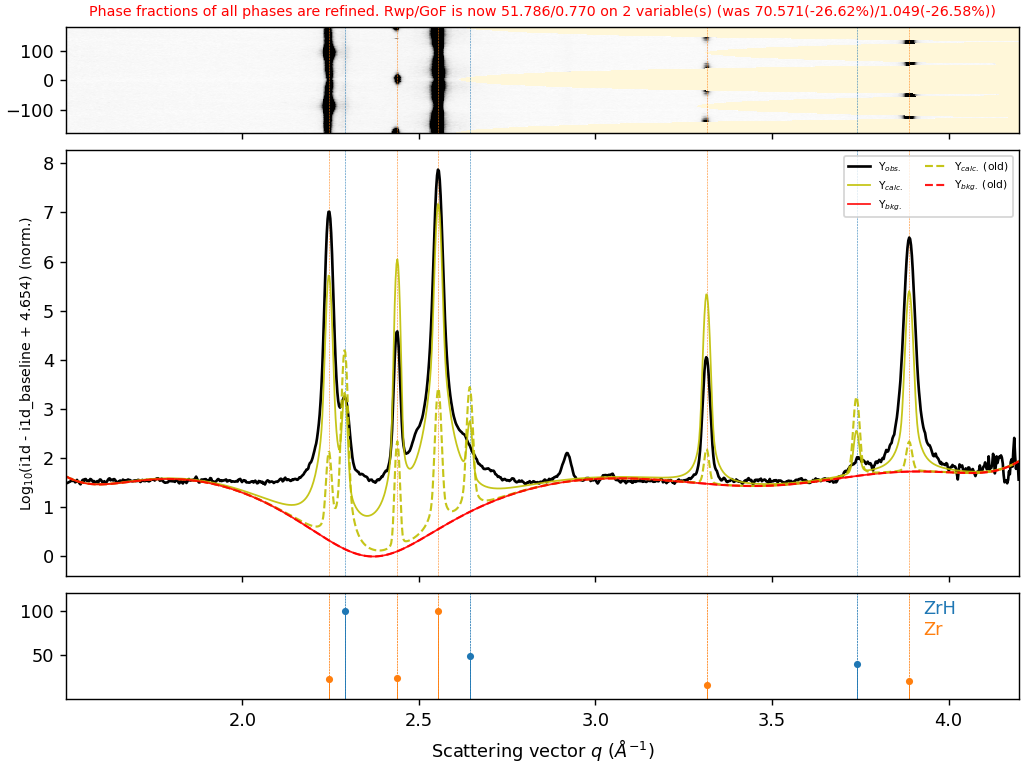

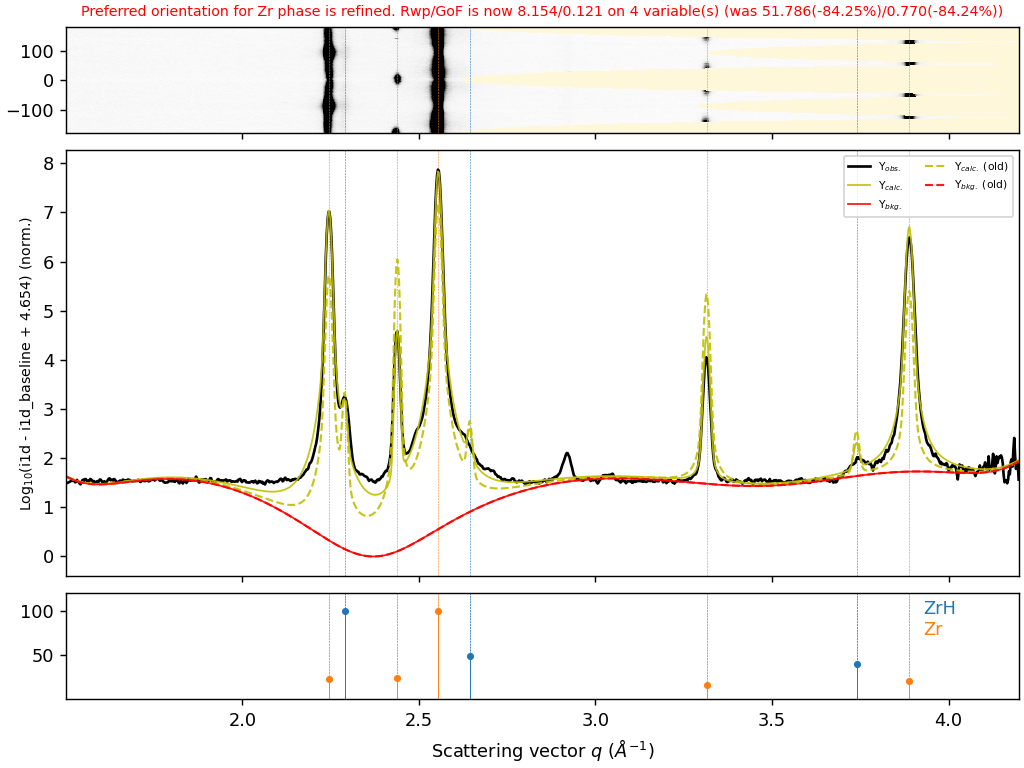

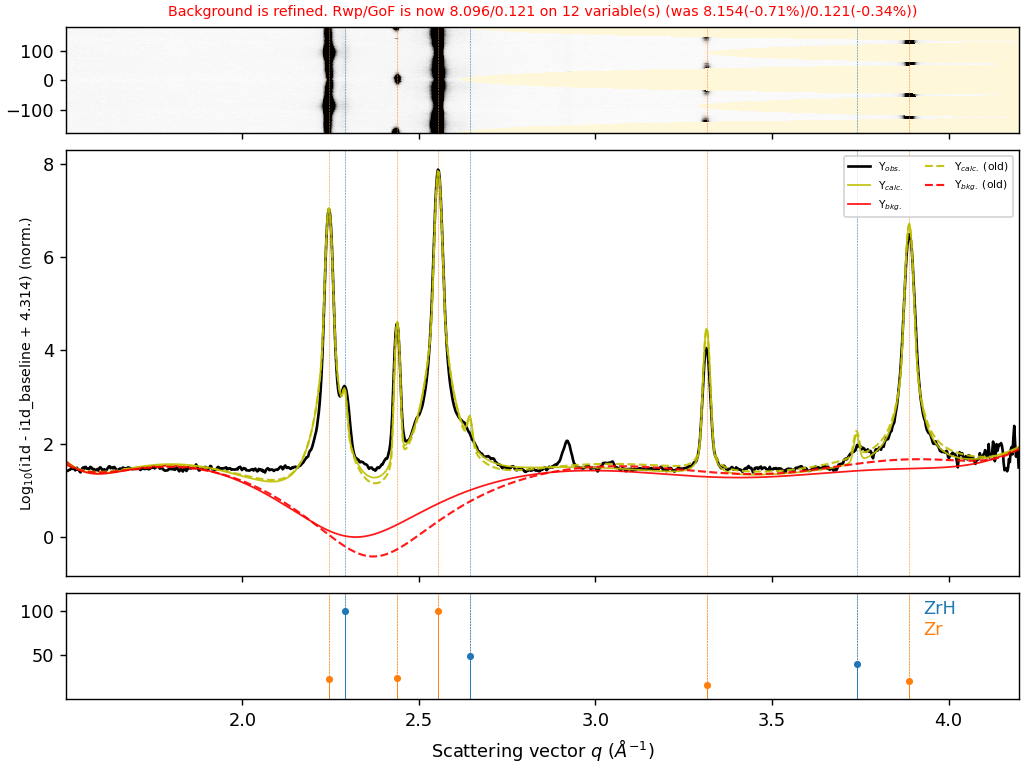

In [162]:
%%time

sample = deepcopy(sample_Dogbone)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_ZrZrH, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=True,
    normalize=True,
    )

# # LeBail part
# sample.refine_background(num_coeffs=5, plot=True)
sample.refine_cell_parameters(plot=True)
# sample.refine_strain_broadening(plot=True)
sample.refine_size_broadening(plot=True,type='uniaxial')
sample.refine_background(num_coeffs=10, plot=True)

# Rietveld part
sample.set_LeBail(set_to=False, refine=True, plot=True)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_preferred_orientation(phase_ind=1, harmonics_order=4, plot=True)
sample.refine_background(num_coeffs=10, plot=True)

In [ ]:
sample.phases['Zr']

In [ ]:
g['SGData']

In [ ]:

plabel = 'Zr'
pind = 0

g = sample.gpx['Phases'][plabel]['General']

c = g['Cell']



first_str = '%s-%s phase (%s)'%(plabel,g['SGData']['SGSys'],g['SGData']['SpGrp'])
cell_str_refined = '\n(from refinement) a=%.4f b=%.4f c=%.4f ($\\alpha$=%.2f $\\beta$=%.2f $\\gamma$=%.2f)'%(c[1],c[2],c[3],c[4],c[5],c[6])
cell_str_initial = '\n(from refinement) a=%.4f b=%.4f c=%.4f ($\\alpha$=%.2f $\\beta$=%.2f $\\gamma$=%.2f)'%(c[1],c[2],c[3],c[4],c[5],c[6])

size = sample.gpx['Phases'][plabel]['Histograms']['PWDR data.xy']['Size']
if size[0] == 'isotropic':
    if size[1][0] == 1.0:
        size_str = ''
    else:
        size_str = 'Size=%.3f($\\mu$) (isotropic)'%(size[1][0])
    
strain = sample.gpx['Phases'][plabel]['Histograms']['PWDR data.xy']['Mustrain']
if strain[0] == 'isotropic':
    if strain[1][0] == 1000:
        strain_str = ''
    else:
        strain_str = 'Mustrain=%.3f($\\mu$) (isotropic)'%(strain[1][0])






comb = '%s %s %s %s %s'%(first_str,cell_str_refined,cell_str_initial,size_str,strain_str)

plt.figure(figsize=(8,6),dpi=128)
plt.title(comb,fontsize=8)




In [ ]:
size = sample.gpx['Phases'][plabel]['Histograms']['PWDR data.xy']['Size']
size

In [ ]:
strain = sample.gpx['Phases'][plabel]['Histograms']['PWDR data.xy']['Mustrain']
strain

In [ ]:
sample.gpx['Phases']['Zr']['General']['SGData']['SGSys']

In [ ]:
sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']

In [ ]:
sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Size']

In [ ]:
%%time

sample = deepcopy(sample_Dogbone)
sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_ZrZrH, plot=False)

sample.setup_gsas2_refiner(
    instprm_from_gpx="gsas_instprms.gpx",
    plot=True,
    normalize=True,
    )

# # # LeBail part
# # sample.refine_background(num_coeffs=5, plot=True)
# sample.refine_cell_parameters(plot=True)
# # sample.refine_strain_broadening(plot=True)
# sample.refine_size_broadening(plot=True)
# sample.refine_background(num_coeffs=10, plot=True)

# # Rietveld part
# sample.set_LeBail(set_to=False, refine=True, plot=True)
# sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
# sample.refine_preferred_orientation(phase_ind=1, harmonics_order=4, plot=True)
# sample.refine_background(num_coeffs=10, plot=True)

In [165]:
sample.ds.attrs['PhaseInd_1_cell_alpha']

90.0